# 機械学習 課題2

※ セルを増やしても大丈夫ですが、すでに書かれているセルの内容を変更しないで下さい。

**この課題におけるベクトルは列ベクトルとします。**

## 1. ニューラルネットワークの順伝搬と逆伝搬

2次元の入力$\pmb{x} \in \mathbb{R}^{2}$を受け取り、2次元の中間層$\pmb{h} \in \mathbb{R}^{2}$を介して、$\hat{y} \in \mathbb{R}$を出力する2層のニューラルネットワークを次式で定義する。
\begin{align*}
\hat{y} = \sigma(\pmb{h}^{\top}\pmb{q}+c), \; \pmb{h}=\mathrm{ReLU}(\pmb{W}\pmb{x} + \pmb{b})
\end{align*}
ただし、$\sigma$はシグモイド関数であり、$\mathrm{ReLU}(a) = \max(a, 0)$である。また、$\pmb{W} \in \mathbb{R}^{2 \times 2}, \pmb{q} \in \mathbb{R}^{2}, b \in \mathbb{R}^2, c \in \mathbb{R}$はモデルのパラメータであり、以下に示す値に設定されているとする。

\begin{align}
\pmb{W} = \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}, \; \pmb{q} = \begin{pmatrix}1 \\ 1\end{pmatrix}, \; \pmb{b} = \begin{pmatrix}-0.5 \\ -1.5\end{pmatrix}, \; c = -0.5 .
\end{align}

以下の問に答えよ。なお、計算は手計算でもプログラムを用いてもよいが、最終的な答えに至る経過が分かるように記述せよ。

**(1) 中間層の計算**

このモデルに入力$\pmb{x}=\begin{pmatrix}1 \\ -1\end{pmatrix}$を与えたとき、中間層の値$\pmb{h}$を求めよ。<!-- 1(1) -->

In [1]:
import numpy as np

x: np.ndarray = np.array([1, -1]).T

W: np.ndarray = np.array([[1, 0], [0, -1]])
q: np.ndarray = np.array([1, 1])
b: np.ndarray = np.array([-0.5, -1.5])
c: np.float64 = -0.5

def ReLU(value):
    return np.maximum(value, 0)

def sigmoid(value: np.float64):
    if 0 <= value:
        return 1 / (1 + np.exp(- value))
    else:
        return 1. - 1 / (1 + np.exp(value))

h = ReLU(np.dot(W, x) + b)
print(h)

[0.5 0. ]


**(2) 出力の計算**

このモデルに入力$\pmb{x}=\begin{pmatrix}1 \\ -1\end{pmatrix}$を与えたとき、出力の値$\hat{y}$を求めよ。<!-- 1(2) -->

In [2]:
x: np.ndarray = np.array([1, -1]).T

h = ReLU(np.dot(W, x) + b)
y_hat: np.float64 = sigmoid(np.dot(h.T, q) + c)

print(y_hat)

0.5


**(3) 損失値の計算**

ある学習事例$(\pmb{x}, y) = \left(\begin{pmatrix}1 \\ -1 \end{pmatrix}, 0\right)$に対する、このニューラルネットワークのクロスエントロピー損失関数$\mathcal{l}(y, \hat{y})$の値を求めよ。<!-- 1(3) -->

In [3]:
def l_binary_cross_entropy(x: np.ndarray, y):

    W: np.ndarray = np.array([[1, 0], [0, -1]])
    q: np.ndarray = np.array([1, 1])
    b: np.ndarray = np.array([-0.5, -1.5])
    c: np.float64 = -0.5

    h = ReLU(np.dot(W, x) + b)
    y_hat = sigmoid(np.dot(h.T, q) + c)

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

x: np.ndarray = np.array([1, -1]).T
y: np.float64 = 0.

print(l_binary_cross_entropy(x, y))

0.6931471805599453


**(4) 勾配の計算**

ある学習事例$(\pmb{x}, y) = \left(\begin{pmatrix}1 \\ -1 \end{pmatrix}, 0\right)$に対して、このニューラルネットワークのクロスエントロピー損失関数$l(y, \hat{y})$のパラメータに関する勾配、すなわち、$\frac{\partial l(y, \hat{y})}{\partial \pmb{W}}$, $\frac{\partial l(y, \hat{y})}{\partial \pmb{q}}$, $\frac{\partial l(y, \hat{y})}{\partial \pmb{b}}$, $\frac{\partial l(y, \hat{y})}{\partial c}$を、それぞれ求めよ。<!-- 1(4) -->

In [4]:
import autograd
import autograd.numpy as np

def loss(w, x):
    y = 0
    q: np.ndarray = np.array([1, 1])
    b: np.ndarray = np.array([-0.5, -1.5])
    c: np.float64 = -0.5

    h = ReLU(np.dot(w, x) + b)
    y_hat = sigmoid(np.dot(h.T, q) + c)

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

x = np.array([1, -1]).T

$\frac{\partial l(y, \hat{y})}{\partial \pmb{W}}$

In [5]:
w = np.ndarray([[1, 0], [0, -1]])

grad_loss = autograd.grad(loss)

print(loss(w, x))
print(grad_loss(w, x))

TypeError: 'list' object cannot be interpreted as an integer

$\frac{\partial l(y, \hat{y})}{\partial \pmb{q}}$

In [6]:

def loss(q: np.ndarray, x: np.ndarray):

    W: np.ndarray = np.array([[1, 0], [0, -1]])
    b: np.ndarray = np.array([-0.5, -1.5])
    c: np.float64 = -0.5
    y = 0
    h = ReLU(np.dot(W, x) + b)
    y_hat = sigmoid(np.dot(h.T, q) + c)

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))

q: np.ndarray = np.ndarray([1, 1])

grad_loss = autograd.grad(loss)
print(loss(q, x))
print(grad_loss(q, x))

ValueError: shapes (2,) and (1,1) not aligned: 2 (dim 0) != 1 (dim 0)

$\frac{\partial l(y, \hat{y})}{\partial \pmb{b}}$

In [ ]:
w = np.array([-0.5, -1.5])


$\frac{\partial l(y, \hat{y})}{\partial c}$

In [ ]:
w: np.float64 = -0.5

## 2. 分類

適切な題材を選び、分類モデル（二値分類でも多値分類でも何でも可）を学習せよ。ただし、以下の観点で採点を行うので、これらを満たすように解答せよ。

**(1) タスクの説明**

選んだ分類タスクの概要（入力と出力が何であるか等）を説明せよ。<!-- 2(1) -->

講義でも紹介されていた[MINIST](https://chokkan.github.io/mlnote/classification/02multi.html#:~:text=%E4%BB%8A%E5%9B%9E%E3%81%AF%E3%80%81-,MNIST,-%E3%82%92%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A8%E3%81%97%E3%81%A6)のデータを用いて、入力が$28\times28=754$ピクセルの画素値が入力であり、出力は0〜9までの数字のうちの１つである。

**(2) データの入手方法・構築方法**

分類モデルを学習するための訓練データや評価データの入手方法を説明せよ。データを自作した場合は、作成方法を説明せよ。<!-- 2(2) -->

講義で用いられていたMINISTのデータを使用する。
以下のコードは、6.12 付録 にて記されていたminist.npzを作成するコードを参考に、細部だけを変更したものである。
(具体的には型情報と関数に対してのコメントを付加したのみで、本質的な動作を変更する処置は施していない。)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import struct
import urllib.request

def read_image(fi) -> np.ndarray:
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

def openurl_gzip(url):
    request = urllib.request.Request(
        url,
        headers={
            "Accept-Encoding": "gzip",
            "User-Agent": "Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11", 
        })
    response = urllib.request.urlopen(request)
    return gzip.GzipFile(fileobj=response, mode='rb')


np.savez_compressed(
    'mnist',
    train_x=read_image(openurl_gzip('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')),
    train_y=read_label(openurl_gzip('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')),
    test_x=read_image(openurl_gzip('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')),
    test_y=read_label(openurl_gzip('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'))
)

In [8]:
data = np.load('mnist.npz')

def image_to_vector(X):
    '''flatten: (N * 28 * 28) -> (N * 784)'''
    return np.reshape(X, (len(X), -1))

train_data_x = image_to_vector(data['train_x'])
train_data_y = data['train_y']

test_data_x = image_to_vector(data['test_x'])
test_data_y = data['test_y']

**(3) モデルの学習**

訓練データで分類モデルを確率的勾配降下法により学習せよ。このとき、各エポック毎に以下の評価値を計算し、グラフとして表示せよ。

+ 訓練データ上の損失関数の値
+ 訓練データ上の正解率
+ 評価データ上の損失関数の値
+ 評価データ上の正解率<!-- 2(3) -->

In [32]:
class StochasticGradientDescent:
    '''SGD: 確率的勾配降下法'''
    MAX_EPOCHS: int = 30 # 60000
    INF: np.float64 = (1 << 30)

    def __init__(self, train_data_x, train_data_y, test_data_x, test_data_y, learning_rate):
        '''Constructor'''
        self.train_SIZE: int = len(train_data_y)
        self.test_SIZE: int = len(test_data_y)
        # get the max and min value of the train_data_y
        minimum_label: int = np.amin(train_data_y)
        max_label: int = np.amax(train_data_y)
        # y を単位行列を用いて変形
        train_data_y_1h = np.eye(10)[train_data_y]
        test_data_y_1h = np.eye(10)[test_data_y]
        # 重みの初期値の設定
        # self.W = np.ndarray(np.random.randint(minimum_label, max_label, len(train_data_x[0])))
        self.W = np.random.randn(len(train_data_x[0]), 10)
        # 学習率
        self.learnig_rate = learning_rate
        # 損失関数の値の配列
        self.loss_train_data: list = []
        self.loss_validation_data: list = []
        # 正解率の値の配列
        self.accuracy_train_data: list = []
        self.accuracy_validation_data: list = []
        # 確率的勾配降下法による更新
        for index in range(self.MAX_EPOCHS):
            # update sequence
            self.__update_sequence(train_data_x, train_data_y_1h, self.train_SIZE)
            # % 表記にして配列に追加する
            # self.accuracy_train_data.append([self.__score(train_data_x, train_data_y) * 100]) : appendは遅いので
            print(self.__score(train_data_x, train_data_y))
            self.accuracy_train_data += [self.__score(train_data_x, train_data_y) * 100]
            self.accuracy_validation_data += [self.__score(test_data_x, test_data_y) * 100]

            # 損失関数の値を配列に追加する
            self.loss_train_data += [self.__clac_loss(train_data_x, train_data_y_1h)]
            self.loss_validation_data += [self.__clac_loss(test_data_x, test_data_y_1h)]

    # @private
    def __predict(self, X) -> int:
        '''最も内積値が高いカテゴリを返す'''
        return (np.dot(X, self.W)).argmax(1)
    
    def __score(self, X, Y):
        '''正しいカテゴリを選べているかの平均'''
        return self.__predict(X == Y).mean()
    
    def __update_sequence(self, train_data_x, train_data_y_1h, SIZE: int):
        '''更新処理のための関数'''
        for _ in range(SIZE):
            id: int = np.random.randint(0, SIZE)
            xn = train_data_x[id]
            yn = train_data_y_1h[id]
            h = np.dot(xn, self.W)
            p = self.__softmax(h)
            update = (yn- p) * self.learnig_rate
            xn = xn.reshape((1, -1))
            update = update.reshape((1, -1))
            # print("x", xn.shape)
            # print("update", update.shape)
            self.W += np.dot(update.T, xn).T
    
    def __softmax(self, a):
        ea = np.exp(a - np.max(a))
        return ea / ea.sum()
    
    def __clac_loss(self, X, y):
        return -(y * np.log(self.__softmax(np.dot(X, self.W)))).mean()

    # @public
    def get_loss(self, key: str):
        '''損失関数の値を返す'''
        if key == 'train':
            return self.loss_train_data
        else:
            return self.loss_validation_data
    
    def get_accuracy(self, key: str):
        '''正解率を返す'''
        if key == 'train':
            return self.accuracy_train_data
        else:
            return self.accuracy_validation_data



In [33]:
learning_rate: np.float64 = 0.07
sgd = StochasticGradientDescent(train_data_x, train_data_y, test_data_x, test_data_y, learning_rate)

print("accuracy train: ", sgd.get_accuracy('train'))
print()
print("loss train: ", sgd.get_loss('train'))
print()
print("accuracy valid: ", sgd.get_accuracy('valid'))
print()
print("loss valid: ", sgd.get_loss('valid'))

/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_83519/930549250.py:48: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return self.__predict(X == Y).mean()


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
accuracy train:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

loss train:  [-4.953632153337234, -5.658911470867736, -6.165394849198364, -5.294701300119884, -5.012733722570418, -6.00596526504249, -5.2552265411626795, -5.920451518394424, -5.091410239979479, -6.319972441165902, -5.8837786862856385, -5.627179062845235, -6.758513419563611, -6.388837365201528, -6.5916983025578535, -5.887235303606436, -6.156211165429627, -7.371374374529033, -6.639514745467863, -6.104766325301119, -6.084105578139264, -6.343887066511904, -6.261026917177786, -6.72685631219811, -6.564122049719639, -6.50899210160749, -6.873640543625217, -6.842284309743862, -6.918070246580118, -7.3435326294806025]

accuracy valid:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

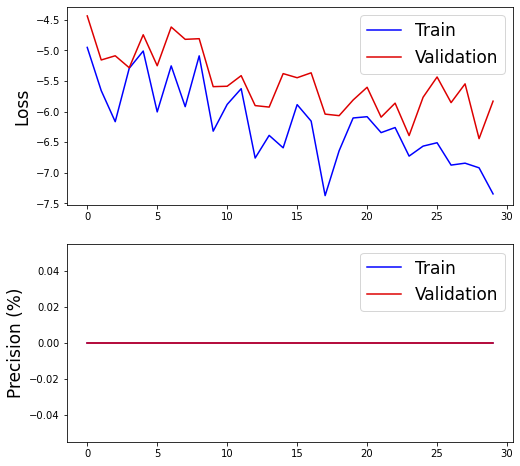

In [34]:
plt.figure(figsize=[8,8])
ax = plt.subplot(211)
ax.set_ylabel('Loss',size=17)
plt.plot(sgd.get_loss('train'),'#0000ff')
plt.plot(sgd.get_loss('valid'),'#dd0000')
plt.legend(['Train','Validation'],prop={'size':17})
ax = plt.subplot(212)
ax.set_ylabel('Precision (%)',size=17)
plt.plot(sgd.get_accuracy('train'),'#0000ff')
plt.plot(sgd.get_accuracy('valid'),'#dd0000')
plt.legend(['Train','Validation'],prop={'size':17})
plt.show()

**(4) 適合率、再現率、F1スコア**

(3)で学習したモデルに対して、評価データ上で以下の評価値を計算せよ。

+ 各分類カテゴリに対する適合率、再現率、F1スコア
+ 各カテゴリの適合率、再現率、F1スコアのマクロ平均を取ったもの<!-- 2(4) -->

**(5) 混同行列**

(3)で学習したモデルに対して、評価データ上で混同行列を計算せよ。<!-- 2()5) -->

**(6) 失敗分析**

評価データの中に、(3)で学習したモデルが正しく分類できないものがあることが通常である。分類に失敗する事例について、その原因を分析・考察せよ。<!-- 2(6) -->